In [1]:
#Ignoring TF warning messages
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3" #21BAI1210

In [2]:
from keras.datasets import mnist
import numpy as np 
(x_train, _), (x_test, _) = mnist.load_data() 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 

In [3]:
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.) 


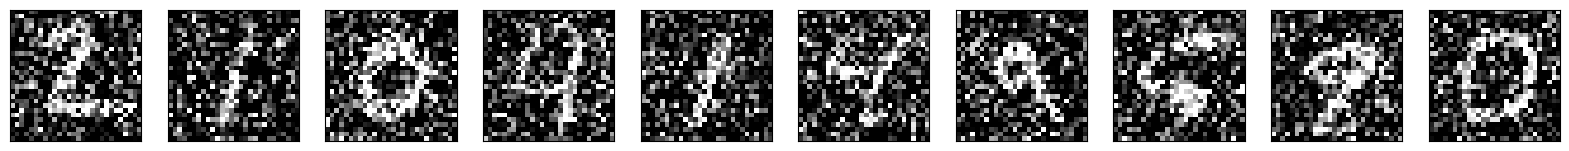

In [5]:
import matplotlib.pyplot as plt 
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
  ax = plt.subplot(1, n, i)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False) 
plt.show() 

In [8]:
import keras
from keras import layers
import tensorflow as tf
from keras.callbacks import TensorBoard 
encoding_dim = 32 # This is our input image 
input_img = keras.Input(shape=(784,)) 

In [11]:
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded) 
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))
encoder = keras.Model(input_img, encoded) 


Epoch 1/100


I0000 00:00:1711098484.407736   17268 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 5s 6ms/step - loss: 0.2418 - val_loss: 0.1858
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1696 - val_loss: 0.1541
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1465 - val_loss: 0.1386
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1361 - val_loss: 0.1320
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1313 - val_loss: 0.1286
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1287 - val_loss: 0.1270
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1274 - val_loss: 0.1262
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1267 - val_loss: 0.1257
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1263 - val_loss: 0.1254
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1260 - val_loss: 0.1251
E

In [12]:
# This is our encoded (32-dimensional) input 
encoded_input = keras.Input(shape=(encoding_dim,)) 
# Retrieve the last layer of the autoencoder model 
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs) 

313/313 [==============================] - 1s 1ms/step


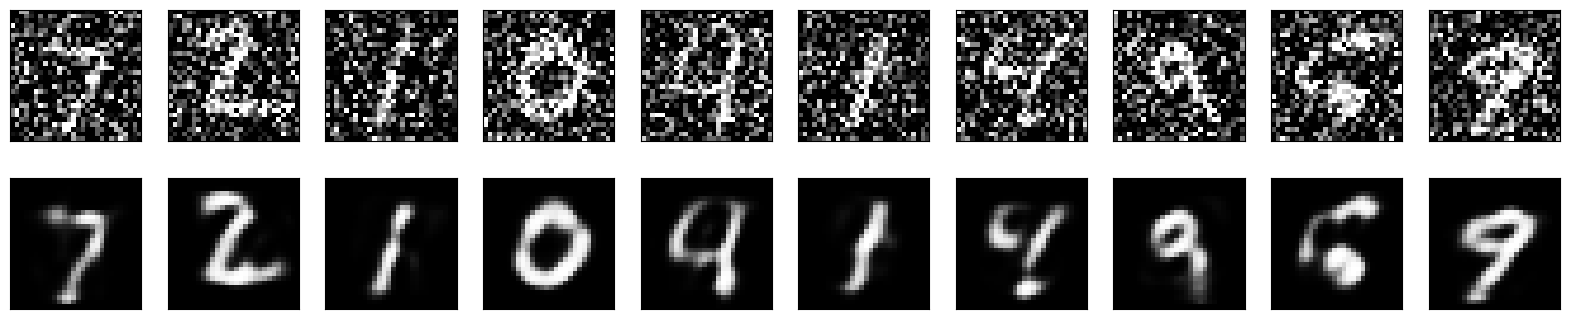

In [21]:
import matplotlib.pyplot as plt 
n = 10 # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n): 
  # Display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray() 

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False) 
  # Display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False) 
plt.show() #21BAI1210
